## Report


##### Import the libraries
+ import numpy as np 
+ import pandas as pd
+ import matplotlib.pyplot as plt
+ import seaborn as sns
+ import tensorflow
+ from tensorflow import keras
+ from keras.models import  Sequential
+ from keras.layers import Dense, Dropout
+ from sklearn.preprocessing import StandardScaler
+ from sklearn.metrics import accuracy_score
+ from mlxtend.plotting import plot_decision_regions


#### Loading the dataset
+ Check the dataset
+ Check the info of data


#### Check the  spead of datapoint using vizualization

#### Performing train test split and Building MLP
+ Identify the Input and Output
+ Segregate the data into train and test part
+ perform preprocessing step
+ perform fit transform on train data and transform on test data


#### Important Steps in MLP
##### Create the Architecture using Sequencial
+ Crete the model 
+ specify the no of nurons and activation function like relu, sigmoid and tanh
+ Specify the kernel_initializer = random_uniform, he_uniform, he_normal, Xavier, Glorot  
+ Specify the input dimension

##### Model Compilation 
+ Specify the Optimizer like gd, sgd, mini batch sgd
+ loss function:
  + For Regression: MSE, MAE, Huber loss
  + For Classification: Binary cross entropy, Categorical cross entropy
+ Specify Metrics as accuracy

##### Training the model
+ fit the X_train_trans and y_train in the model means leaning the patterns, relationship between input and output
+ Specify the batch size
+ specify the epochs and validation_split

##### MLP Evaluation and Plotting decision surfaces
+ check the prediction of X_test_trans
+ check the accuracy score
+ Try to compair the loss and val_loss using vizualization so can understand the underfitting and overfitting
+ plot the decision surface of X_train_trans, y_train
+ plot the decision surface of X_test_trans, y_test

Importing Requisite Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = 'all'

import warnings
warnings.filterwarnings('ignore')

%config InlineBackend.figure_format='retina'

In [2]:
import tensorflow
from tensorflow import keras
from keras.models import  Sequential
from keras.layers import Dense, Dropout


Loading the dataset

In [3]:
df = pd.read_csv(r"E:\Excel_files\Deep Learning\demo_data\6.overlap.csv", header = None)

In [4]:
df.head()

,0,1,2
0,7.0,3.2,0
1,6.4,3.2,0
2,6.9,3.1,0
3,5.5,2.3,0
4,6.5,2.8,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       100 non-null    float64
 1   1       100 non-null    float64
 2   2       100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


Plotting the datapoints to identify shape

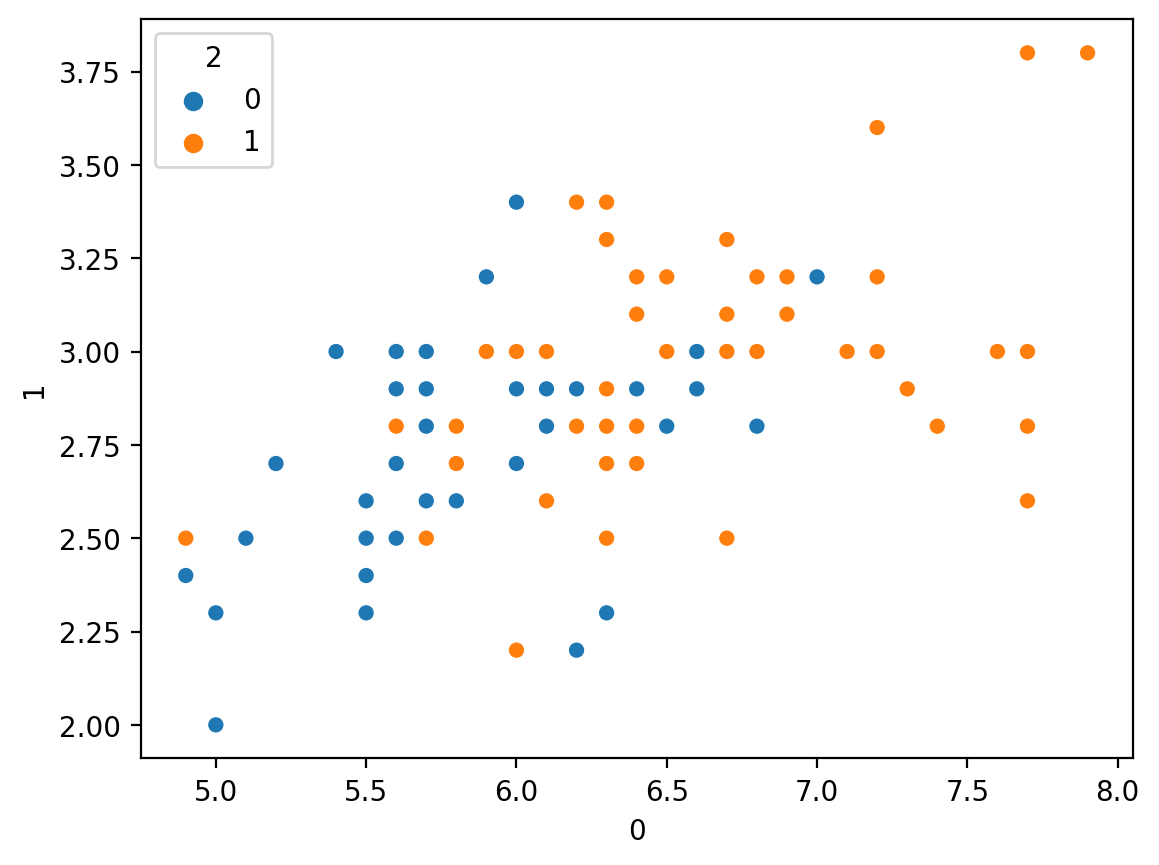

In [6]:
sns.scatterplot(x = 0,y=1, hue = 2, data = df);

Performing train test split and Building MLP

In [7]:
X = df[[0,1]]
y=df[2]

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_trans=sc.fit_transform(X_train)

In [10]:
X_test_trans = sc.transform(X_test)

In [89]:
model = Sequential()
model.add(Dense(10,activation='relu',kernel_initializer = "he_normal", input_dim = 2))
model.add(Dense(9,activation='relu',kernel_initializer = "he_normal"))
model.add(Dense(8,activation='relu',kernel_initializer = "he_normal"))
model.add(Dense(6,activation='relu',kernel_initializer = "he_normal"))
model.add(Dense(5,activation='relu',kernel_initializer = "he_normal"))
model.add(Dense(4,activation='relu',kernel_initializer = "he_normal"))
model.add(Dense(3,activation='relu',kernel_initializer = "he_normal"))
model.add(Dense(2,activation='relu',kernel_initializer = "he_normal"))
model.add(Dense(1,activation='sigmoid'))

In [90]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_57 (Dense)            (None, 10)                30        
                                                                 
 dense_58 (Dense)            (None, 9)                 99        
                                                                 
 dense_59 (Dense)            (None, 8)                 80        
                                                                 
 dense_60 (Dense)            (None, 6)                 54        
                                                                 
 dense_61 (Dense)            (None, 5)                 35        
                                                                 
 dense_62 (Dense)            (None, 4)                 24        
                                                                 
 dense_63 (Dense)            (None, 3)                

Model Compilation and Training

In [91]:
model.compile(optimizer='Adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [92]:
history = model.fit(X_train_trans,y_train,epochs = 60 ,validation_split = 0.2 )

Epoch 1/60
2/2 [==============================] - 4s 527ms/step - loss: 0.9155 - accuracy: 0.5156 - val_loss: 0.9962 - val_accuracy: 0.4375
Epoch 2/60
2/2 [==============================] - 0s 100ms/step - loss: 0.8886 - accuracy: 0.4531 - val_loss: 0.9601 - val_accuracy: 0.4375
Epoch 3/60
2/2 [==============================] - 0s 93ms/step - loss: 0.8648 - accuracy: 0.5000 - val_loss: 0.9273 - val_accuracy: 0.5000
Epoch 4/60
2/2 [==============================] - 0s 97ms/step - loss: 0.8389 - accuracy: 0.5000 - val_loss: 0.8979 - val_accuracy: 0.4375
Epoch 5/60
2/2 [==============================] - 0s 94ms/step - loss: 0.8192 - accuracy: 0.5156 - val_loss: 0.8692 - val_accuracy: 0.4375
Epoch 6/60
2/2 [==============================] - 0s 100ms/step - loss: 0.8007 - accuracy: 0.5156 - val_loss: 0.8426 - val_accuracy: 0.4375
Epoch 7/60
2/2 [==============================] - 0s 96ms/step - loss: 0.7846 - accuracy: 0.5156 - val_loss: 0.8178 - val_accuracy: 0.4375
Epoch 8/60
2/2 [========

MLP Evaluation and Plotting decision surfaces

In [93]:
Y_cap = model.predict(X_test_trans)

1/1 [==============================] - 0s 221ms/step


In [94]:
Y_cap_f = np.where(Y_cap>0.5,1,0)

In [95]:
Y_cap_f

array([[0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0]])

In [96]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,Y_cap_f)

0.65

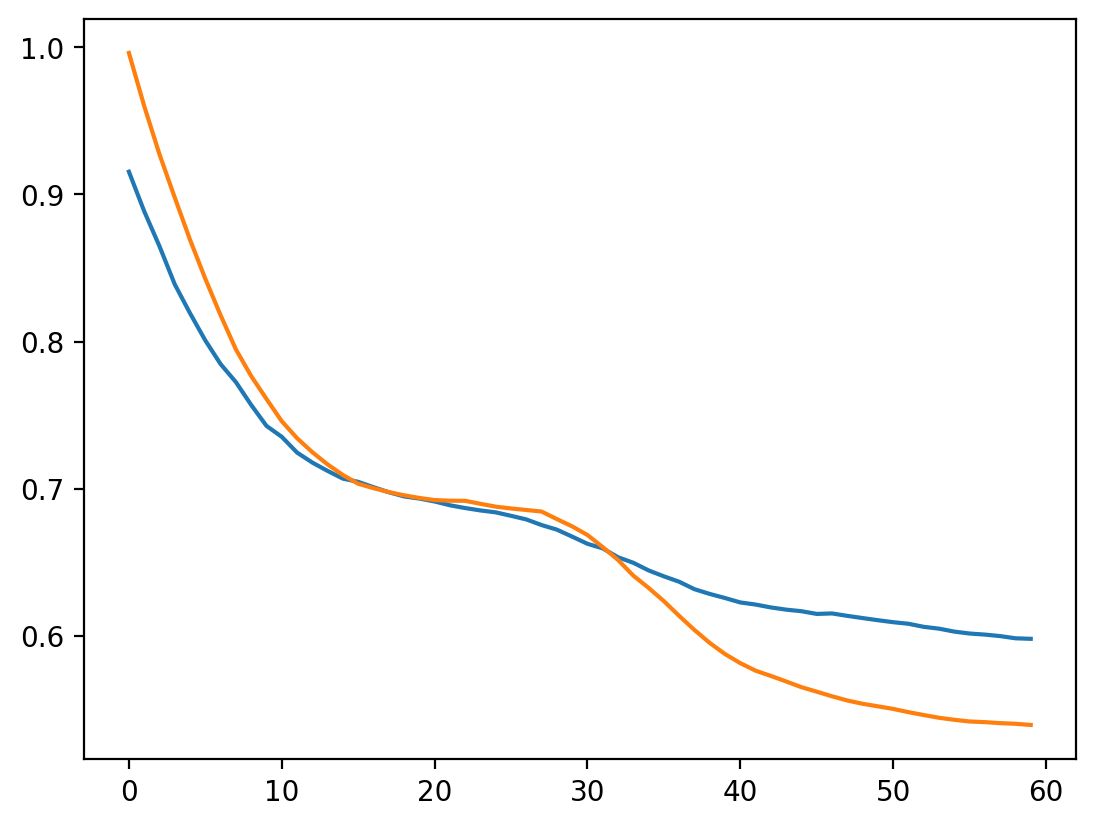

In [97]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']);

In [98]:
# !pip install mlxtend --upgrade

In [99]:
from mlxtend.plotting import plot_decision_regions

9600/9600 [==============================] - 33s 3ms/step


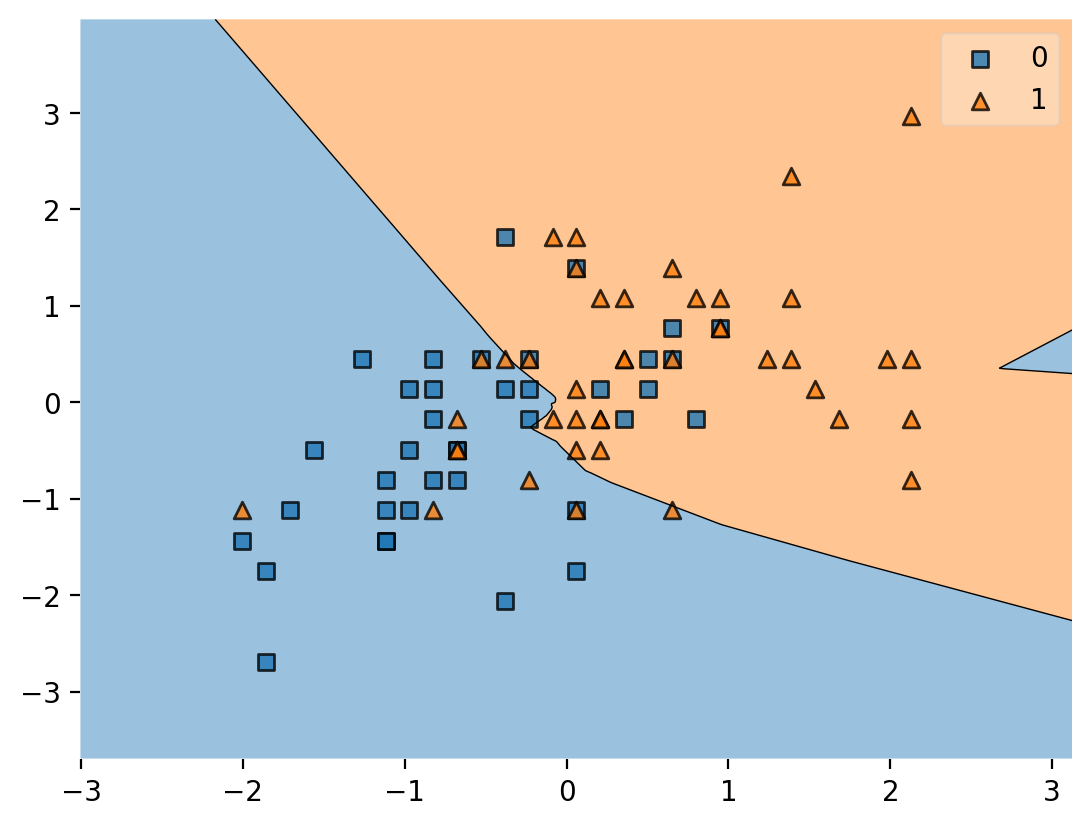

In [101]:
plot_decision_regions(X_train_trans, y_train.values.astype(int), clf = model);

9600/9600 [==============================] - 32s 3ms/step


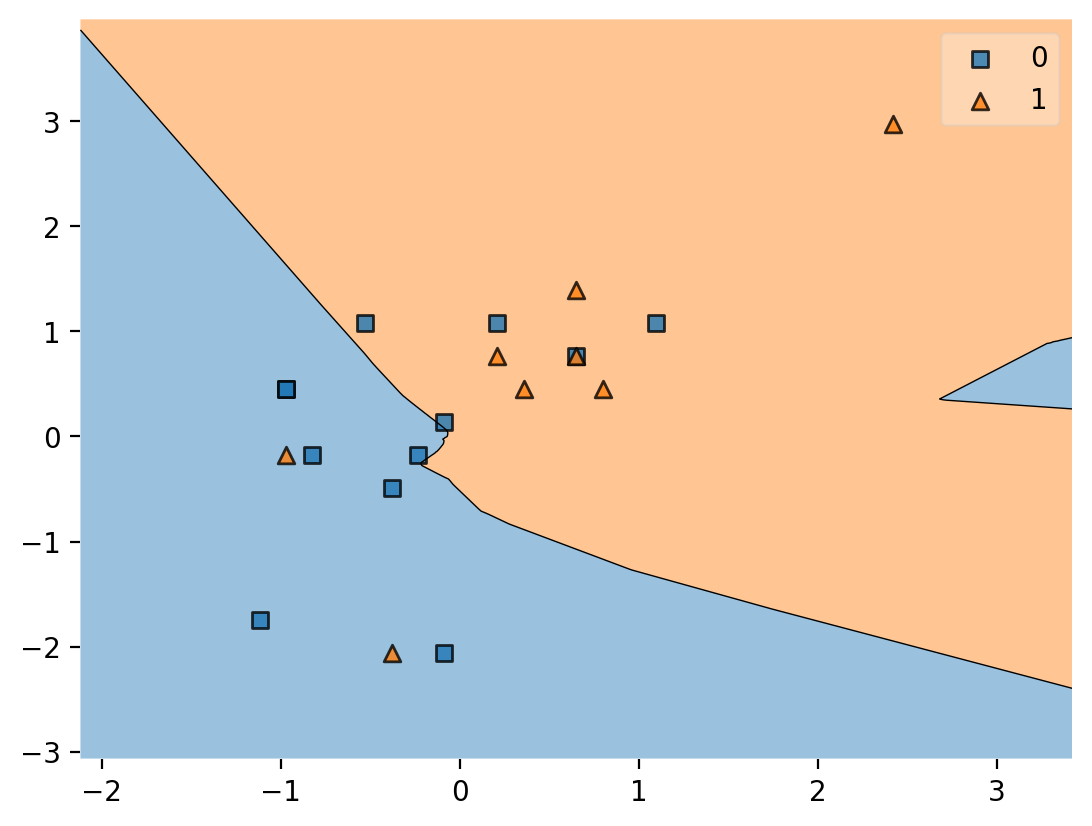

In [102]:
plot_decision_regions(X_test_trans, y_test.values.astype(int), clf = model);

### Accuracy: 65.00%